<a href="https://colab.research.google.com/github/sketchydough/Pytorch-DL-Practice/blob/main/ObjectDetection_keras_MobileNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
model=MobileNetV2(weights='imagenet',include_top=True)


14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
from google.colab import files
uploaded = files.upload()

Saving cars.jpg to cars (1).jpg


In [6]:
#Get the filename and load it
cars = list(uploaded.keys())[0]
print(f"Uploaded file: {cars}")

img=image.load_img(cars,target_size=(224,224))

image_np = np.array(img)
image_np=np.expand_dims(image_np,axis=0)

Uploaded file: cars (1).jpg


In [7]:
#preprocess the image for mobilenetv2 model
image_np=tf.keras.applications.mobilenet_v2.preprocess_input(image_np)

In [8]:
#predictions
predictions=model.predict(image_np)
decoded_predictions=tf.keras.applications.mobilenet_v2.decode_predictions(predictions,top=3)[0]
#display top 3 predicted objects
for i, (imagenet_id,label,score) in enumerate(decoded_predictions):
  print(f'{i+1}:{label} ({score*100:.2f}%)')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1:cab (50.83%)
2:pickup (15.04%)
3:beach_wagon (11.16%)


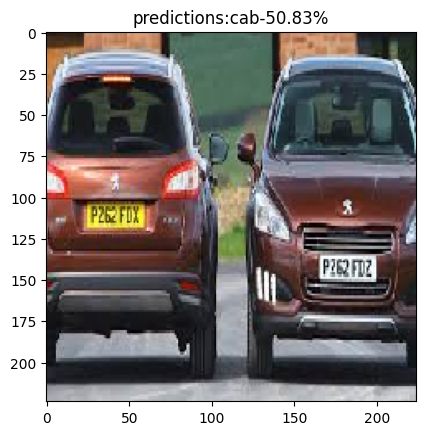

In [9]:
#visualize
plt.imshow(img)
plt.title(f'predictions:{decoded_predictions[0][1]}-{decoded_predictions[0][2]*100:.2f}%')
plt.show()